In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [55]:
df = pd.read_csv('data_table.csv')

In [56]:
df.head()

,Food_Name,Category,Quantity,Calorie,Protein,Carbohydrate,Fat,Diabetes_Type1,Diabetes_Type2,Dyslipidemia_HighColestrol,Dyslipidemia_LowColestrol,CKD
0,Buckwheat,Breakfast Cereals,100 g,343,13.0,72.0,3.4,no,yes,yes,no,yes
1,Buckwheat flour whole-groat,Grains and pasta100gm,100 g,335,13.0,71.0,3.1,no,yes,yes,no,yes
2,Pancakes Buckwheat Dry Mix Incomplete,Baked Foods,100 g,340,2.7,10.9,71.3,no,yes,yes,no,yes
3,Snacks Rice Cakes Brown Rice Buckwheat Unsalted,Snacks,100 g,380,3.5,9.0,80.1,no,yes,yes,no,yes
4,Bread and oatmeal,Breakfast Cereals,100 g,269,17.0,18.0,6.0,no,yes,yes,no,no


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 12 columns):
Food_Name                     248 non-null object
Category                      247 non-null object
Quantity                      237 non-null object
Calorie                       248 non-null int64
Protein                       248 non-null float64
Carbohydrate                  248 non-null float64
Fat                           248 non-null float64
Diabetes_Type1                167 non-null object
Diabetes_Type2                220 non-null object
Dyslipidemia_HighColestrol    166 non-null object
Dyslipidemia_LowColestrol     166 non-null object
CKD                           197 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 23.4+ KB


In [58]:
df.describe()

,Calorie,Protein,Carbohydrate,Fat
count,248.000000,248.000000,248.000000,248.000000
mean,214.745968,8.653185,16.901250,13.481935
std,218.644286,10.098584,22.025806,25.043464
min,1.000000,0.000000,0.000000,0.000000
25%,44.250000,1.100000,2.777500,0.237500
50%,130.000000,3.600000,7.615000,1.950000
75%,335.500000,14.030000,21.165000,13.027500
max,902.000000,72.000000,93.530000,128.000000


Text(0.5, 0, 'Calorie')

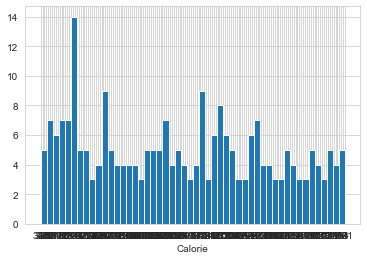

In [15]:
sns.set_style('whitegrid')
df['Calorie'].hist(bins=50)
plt.xlabel('Calorie')

In [ ]:
sns.pairplot(df,hue='Diabetes_Type1',palette='Dark2')

In [ ]:
sns.pairplot(df,hue='Diabetes_Type2',palette='Dark2')

In [ ]:
sns.pairplot(df,hue= 'Dyslipidemia_HighColestrol',palette='Dark2')

In [ ]:
sns.pairplot(df,hue='Dyslipidemia_LowColestrol',palette='Dark2')

In [ ]:
sns.pairplot(df,hue='CKD',palette='Dark2')

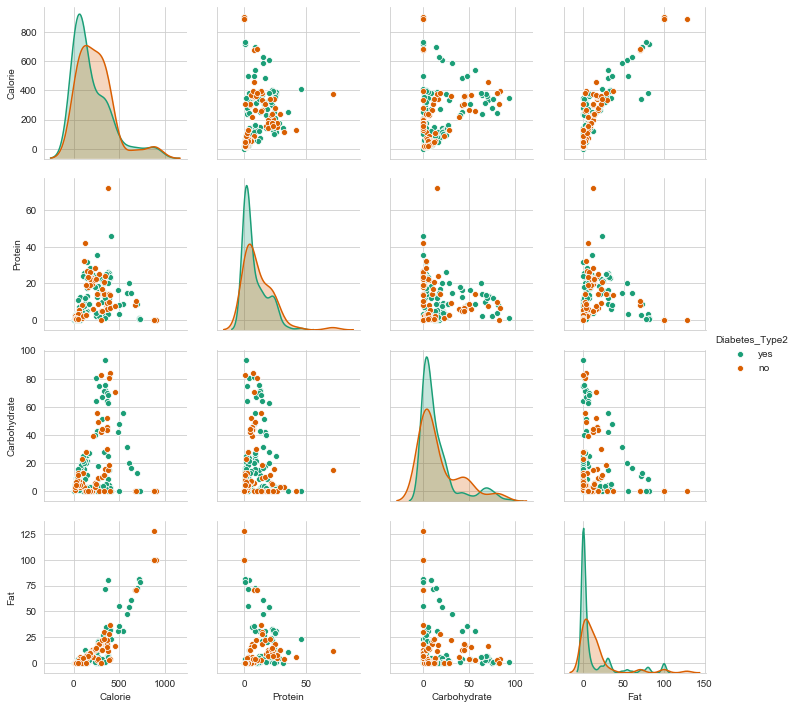

In [60]:
sns.pairplot(df,hue='Diabetes_Type2',palette='Dark2')

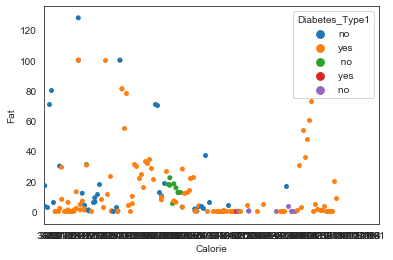

In [5]:
sns.stripplot(x="Calorie", y="Fat", data=df,jitter=True, hue = 'Diabetes_Type1') 

In [61]:
from sklearn.model_selection import train_test_split

In [67]:
X = df[['Protein', 'Carbohydrate','Fat']]
y = df['Calorie']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\afrin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\afrin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
predictions = logmodel.predict(X_test)

In [72]:
from sklearn.metrics import classification_report

In [74]:
##print(classification_report(y_test,predictions))

Text(0.5, 0, 'CKD')

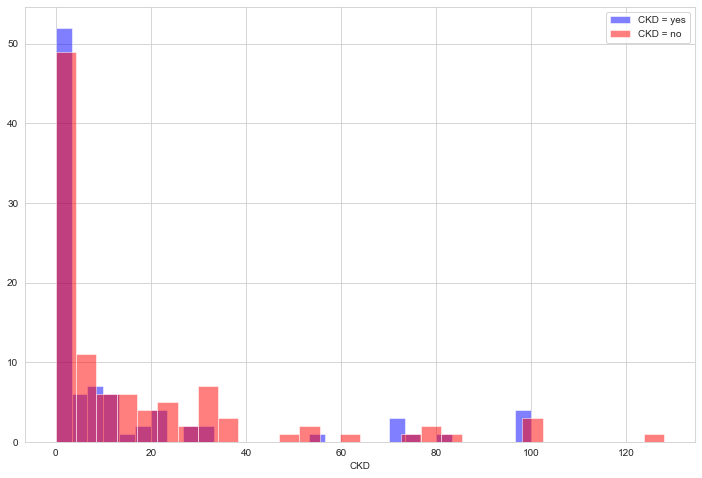

In [81]:
plt.figure(figsize=(12,8))
df[df['CKD']=='yes']['Fat'].hist(alpha=0.5,color='blue',
                                              bins=30,label='CKD = yes')
df[df['CKD']=='no']['Fat'].hist(alpha=0.5,color='red',
                                              bins=30,label='CKD = no')
plt.legend()
plt.xlabel('CKD')

Text(0.5, 0, 'CKD')

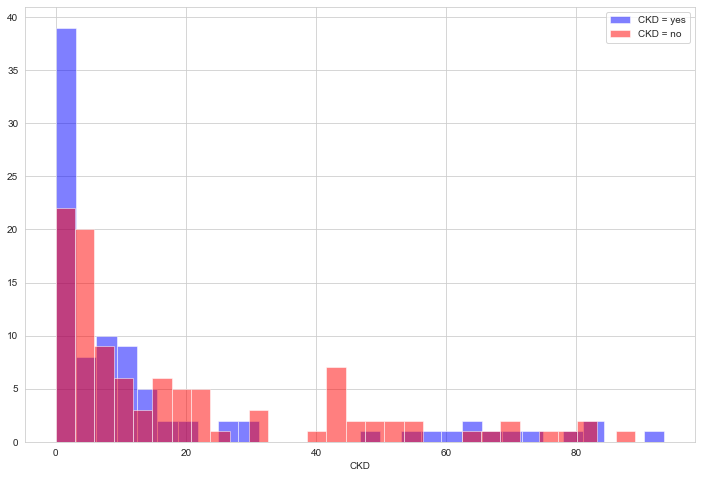

In [83]:
plt.figure(figsize=(12,8))
df[df['CKD']=='yes']['Carbohydrate'].hist(alpha=0.5,color='blue',
                                              bins=30,label='CKD = yes')
df[df['CKD']=='no']['Carbohydrate'].hist(alpha=0.5,color='red',
                                              bins=30,label='CKD = no')
plt.legend()
plt.xlabel('CKD')

Text(0.5, 0, 'Diabetes Type1')

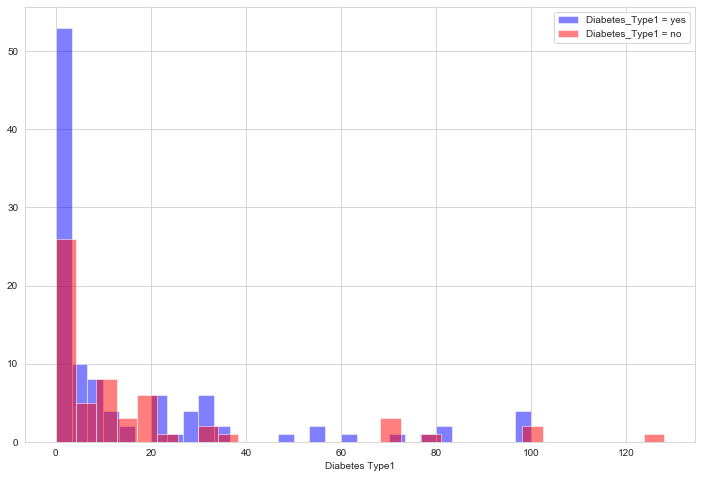

In [91]:
plt.figure(figsize=(12,8))
df[df['Diabetes_Type1']=='yes']['Fat'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Diabetes_Type1 = yes')
df[df['Diabetes_Type1']=='no']['Fat'].hist(alpha=0.5,color='red',
                                              bins=30,label='Diabetes_Type1 = no')
plt.legend()
plt.xlabel('Diabetes Type1')

Text(0.5, 0, 'Dyslipidemia Low Colestrol')

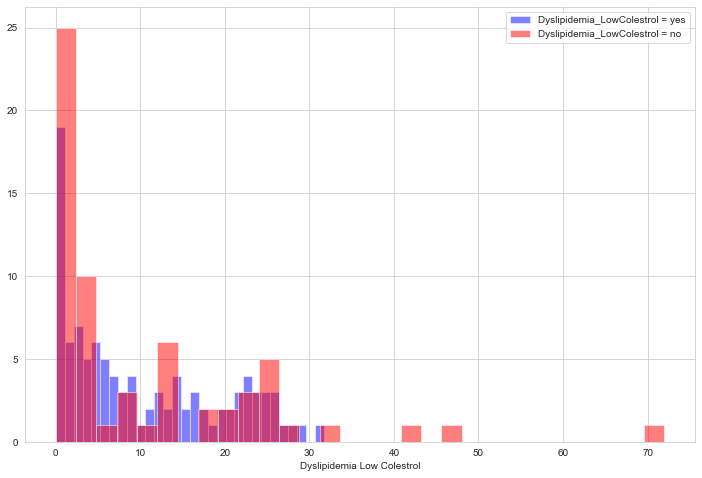

In [97]:
plt.figure(figsize=(12,8))
df[df['Dyslipidemia_LowColestrol']=='yes']['Protein'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Dyslipidemia_LowColestrol = yes')
df[df['Dyslipidemia_LowColestrol']=='no']['Protein'].hist(alpha=0.5,color='red',
                                              bins=30,label='Dyslipidemia_LowColestrol = no')
plt.legend()
plt.xlabel('Dyslipidemia Low Colestrol')